## Assignment 1 | Exploring and Visualizing Data

### Overview

The Northwestern MSDS program administrators are interested in finding out the best way to structure the program, going 

forward. More specifically, they would like to know what programming language to teach the courses in and what electives 

they will offer. To make a fully-informed decision, a survey was distributed to current students in the MSDS program to 

gauge their interests in both programming languages and potential electives. The survey has been collected and analyzed in 

various ways to help guide the administrators in enhancing the program. 

<br>

In order to address each question, the data was parsed out accordingly from the original file. To answer the first 

question, which programming language should be used primarily for future classes, a mean was taken for all responses. Due 

to high level of variance, this value was not very meaningful. What it did show was that both R and Python had the highest 

average response in the mid-30s. To get a better understanding of the responses, a histogram was constructed for each 

language. It became increasingly obvious that both Java languages and SAS could be removed from consideration, leaving only 

R and Python. Before making a final determination, it was necessary to understand if the responses changed based on the 

context, such as industry, professional or personal. A correlation plot showed that the responses between each context for 

a given language were highly correlated between .65 and .79, indicating that students mostly had the same response 

regardless of context. Another consideration was the determine if there was a link between courses completed and responses, 

with the assumption being that the answers of students with more classes completed would carry more weight than new 

students who may not have any programming experience. The results showed that there was no relationship.

<br>

To determine which classes should be offered, first the mean was calculated for the four possible options with the Python 

course logging the highest mean score of 73.5, much greater than the second highest class, Foundations in Data Engineering, 

with a mean score of 58. Likewise, this data exhibited high variance like the language preference responses. Next, the 

distributions of the responses for each course were plotted, further showing that the Python class had the most responses 

at or near 100. 

<br>

It is recommended that given the high interest shown for Python in both questions, that the Python class be included as an 

elective.  Additionally, given the similar scores shown for both R and Python as the preferred programming language, future 

courses should be offered as one or the other. 


### 1.1 | Load Modules

In [2]:
import pandas as pd  # data frame operations  
import nbconvert # convert to pdf
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import seaborn as sns  # pretty plotting, including heat map

### 1.2 | Load Data

In [4]:
#define filepath
file = "C:/Users/David/OneDrive/MSDS/MSDS422/Week1/Assignment/mspa-survey-data.csv"
df = pd.read_csv(file)
#set RespondentID as index
df.set_index('RespondentID', drop = True, inplace = True)
#check strucuture of data
df.head()

,Personal_JavaScalaSpark,Personal_JavaScriptHTMLCSS,Personal_Python,Personal_R,Personal_SAS,Professional_JavaScalaSpark,Professional_JavaScriptHTMLCSS,Professional_Python,Professional_R,Professional_SAS,...,PREDICT453,PREDICT454,PREDICT455,PREDICT456,PREDICT457,OtherPython,OtherR,OtherSAS,Other,Graduate_Date
RespondentID,,,,,,,,,,,,,,,,,,,,,
5135740122,0,0,0,50,50,0,0,0,25,75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5133300037,10,10,50,30,0,25,25,30,20,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring 2018
5132253300,20,0,40,40,0,0,0,40,40,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall 2018
5132096630,10,10,25,35,20,10,10,25,35,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall 2017
5131990362,20,0,0,70,10,20,0,0,80,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CS-435 with Weka,Fall 2018


### 1.3 | Pre-processing Data

In [5]:
#organize fields into easily callable groups by purpose of languge
personal_fields = ["Personal_JavaScalaSpark","Personal_JavaScriptHTMLCSS","Personal_Python","Personal_R","Personal_SAS"]
professional_fields = ["Professional_JavaScalaSpark","Professional_JavaScriptHTMLCSS","Professional_Python","Professional_R","Professional_SAS"]
industry_fields = ["Industry_JavaScalaSpark","Industry_JavaScriptHTMLCSS","Industry_Python","Industry_R","Industry_SAS"]
#organize fields into easily callable by langage regardless of purpose of use
jss_fields = ["Personal_JavaScalaSpark","Professional_JavaScalaSpark","Industry_JavaScalaSpark"]
jsh_fields = ["Personal_JavaScriptHTMLCSS","Professional_JavaScriptHTMLCSS","Industry_JavaScriptHTMLCSS"]
python_fields = ["Personal_Python","Professional_Python","Industry_Python"]
r_fields = ["Personal_R","Professional_R","Industry_R"]
sas_fields = ["Personal_SAS","Professional_SAS","Industry_SAS"]
#orangize classes taken fields
class_fields = ["PREDICT400","PREDICT401","PREDICT410","PREDICT411","PREDICT413","PREDICT420","PREDICT422","PREDICT450","PREDICT451",
                "PREDICT452","PREDICT453","PREDICT454","PREDICT455","PREDICT456","PREDICT457"]
#organize interest fields
interest_fields = ["Python_Course_Interest","Foundations_DE_Course_Interest","Analytics_App_Course_Interest","Systems_Analysis_Course_Interest"]

# def encoder to create a binary nan value
def value_encoder(i):
    if i != i: catstr = "0"
    else: catstr = "1"
    catstr = int(catstr)
    return(catstr)

# apply encoder to class values in order to sum how many classes an individual has taken
for i in df.columns[20:38]:
    df[i] = df[i].map(value_encoder)

#sum number of programming classes taken per respondent as Courses_Completed may include other without programming component
df["Courses_Completed_Prog"] = df[class_fields].sum(axis=1)

def courses_completed_group(i):
    i = int(i)
    if i > 0 and i <= 3: catstr = "0-3"
    elif i > 3 and i <= 6: catstr = "4-6"
    else: catstr = "7-10"
    return(catstr)

#map bucket
df["Courses_Completed_Bucket"] = df["Courses_Completed_Prog"].map(courses_completed_group)
#rebuild class organization of fields
class_fields = ["PREDICT400","PREDICT401","PREDICT410","PREDICT411","PREDICT413","PREDICT420","PREDICT422","PREDICT450","PREDICT451",
                "PREDICT452","PREDICT453","PREDICT454","PREDICT455","PREDICT456","PREDICT457","Courses_Completed_Prog"]

In [6]:
#overview of key statistics
for i in [personal_fields,professional_fields,industry_fields]:
    print(df[i].describe())
    print('---------------------------------------------------------------------------------')
#on a personal level R and Python are the leaders by mean but all language have a high std
#on a professional level R and Python are again the leaders by mean but with equally high std
#on an industry level R and Pytho are again again the leaders by mean with high std

       Personal_JavaScalaSpark  Personal_JavaScriptHTMLCSS  Personal_Python  \
count               207.000000                  207.000000       207.000000   
mean                 10.135266                    4.797101        31.304348   
std                  11.383477                    6.757764        15.570982   
min                   0.000000                    0.000000         0.000000   
25%                   0.000000                    0.000000        20.000000   
50%                   9.000000                    0.000000        30.000000   
75%                  20.000000                   10.000000        40.000000   
max                  70.000000                   30.000000        90.000000   

       Personal_R  Personal_SAS  
count  207.000000    207.000000  
mean    37.125604     16.637681  
std     14.576003     13.626400  
min      0.000000      0.000000  
25%     30.000000      5.000000  
50%     35.000000     15.000000  
75%     50.000000     25.000000  
max    100.00000

In [7]:
for i in [jss_fields,jsh_fields,python_fields,r_fields,sas_fields]:
    print(df[i].describe())
    print('---------------------------------------------------------------------------------')
# All 5 languages have near equal distribution of scores regardless of intent (personal, professional, industrial) meaning that
# disregarding intent in further analysis may be acceptable. Scaling these scores may provide a different perspective.

       Personal_JavaScalaSpark  Professional_JavaScalaSpark  \
count               207.000000                   207.000000   
mean                 10.135266                     9.251208   
std                  11.383477                    13.167505   
min                   0.000000                     0.000000   
25%                   0.000000                     0.000000   
50%                   9.000000                     5.000000   
75%                  20.000000                    15.000000   
max                  70.000000                    80.000000   

       Industry_JavaScalaSpark  
count               207.000000  
mean                 11.942029  
std                  14.706399  
min                   0.000000  
25%                   0.000000  
50%                   5.000000  
75%                  20.000000  
max                  70.000000  
---------------------------------------------------------------------------------
       Personal_JavaScriptHTMLCSS  Professional_JavaS

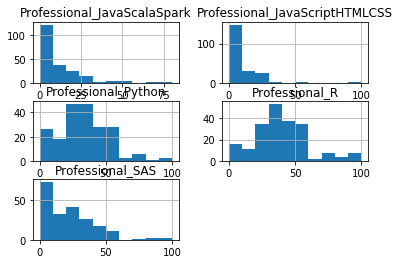

In [8]:
#plot histogram for all defined professional fields
df[professional_fields].hist()
plt.xlabel("Interest Score (0-100)")
plt.grid(True)
plt.show()


In [9]:
#visualzing scatterplots to confirm similiaries of scores across intent
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] p
    = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None) 

for i in [jss_fields,jsh_fields,python_fields,r_fields,sas_fields]:
    corr_chart(df_corr = df[i])

#chart appears to indicate that language by intent is not as highly correlated as previously shown in key stats above.
#JavascriptHTML has the weakest correlation by intent at .52 - .62 while Python shows the strongest correlaton at .73 - .79


SyntaxError: invalid syntax (<ipython-input-9-3eb6b312547e>, line 6)

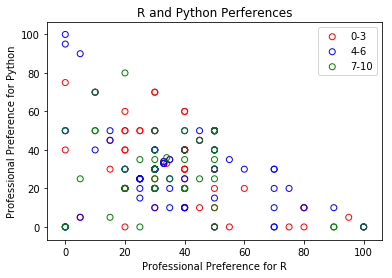

In [18]:
#visualize preferences by number of programming courses taken. Do students with more experience have a preference?
# single scatter plot example
# define structure of plot
fig, axis = plt.subplots()
axis.set_xlabel('Professional Preference for R')
axis.set_ylabel('Professional Preference for Python')
plt.title('R and Python Perferences')


for i,j in zip(['0-3','4-6','7-10'],['red','blue','green']):
    scatter_plot = axis.scatter(df[df["Courses_Completed_Bucket"]==i]['Professional_R'],df[df["Courses_Completed_Bucket"]==i]['Professional_Python'],
                                facecolor = 'none',edgecolor = j,label = i)
plt.legend()

#there doesn't seem to be much a correlation between number of courses taken and preference as the buckets are evenly dispersed.


In [16]:
i

['Personal_SAS', 'Professional_SAS', 'Industry_SAS']

### 1.4 | Scaling of Variables

C:\Users\David\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\David\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\David\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


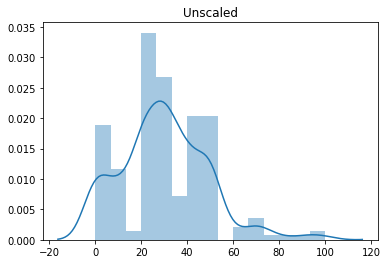

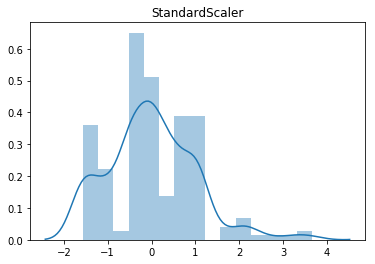

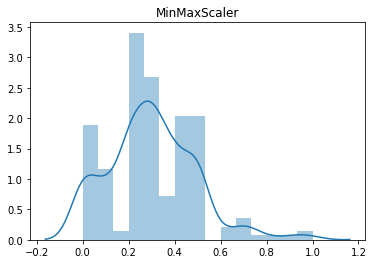

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer

X = df[["Professional_Python"]].dropna()
unscaled_fig, ax = plt.subplots()
sns.distplot(X).set_title('Unscaled')
#unscaled_fig.savefig('Transformation-Unscaled' + '.pdf', 
#    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
#    orientation='portrait', papertype=None, format=None, 
#    transparent=True, pad_inches=0.25, frameon=None)  

standard_fig, ax = plt.subplots()
sns.distplot(StandardScaler().fit_transform(X)).set_title('StandardScaler')
#standard_fig.savefig('Transformation-StandardScaler' + '.pdf', 
#    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
#    orientation='portrait', papertype=None, format=None, 
#    transparent=True, pad_inches=0.25, frameon=None)

minmax_fig, ax = plt.subplots()
sns.distplot(MinMaxScaler().fit_transform(X)).set_title('MinMaxScaler')
minmax_fig.savefig('Transformation-MinMaxScaler' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None) 

#plotting a variables against a few scaling options. StandardScaler and MinMaxScaler seem to preserve the distribution well
#but StandardScaler is based around 0 which is more intuitive. Additionally, the values in the data are not subject to any
#extreme outliers, which if they were minmax might be be a better option.

In [16]:
#scale all numeric values in data
df2 = pd.DataFrame(StandardScaler().fit_transform(df[personal_fields+professional_fields+industry_fields+class_fields+interest_fields]),
                   columns = df[personal_fields+professional_fields+industry_fields+class_fields+interest_fields].columns, index = df.index)
df2.head()

C:\Users\David\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\David\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Personal_JavaScalaSpark,Personal_JavaScriptHTMLCSS,Personal_Python,Personal_R,Personal_SAS,Professional_JavaScalaSpark,Professional_JavaScriptHTMLCSS,Professional_Python,Professional_R,Professional_SAS,...,PREDICT453,PREDICT454,PREDICT455,PREDICT456,PREDICT457,Courses_Completed_Prog,Python_Course_Interest,Foundations_DE_Course_Interest,Analytics_App_Course_Interest,Systems_Analysis_Course_Interest
RespondentID,,,,,,,,,,,,,,,,,,,,,
5135740122,-0.892507,-0.711586,-2.015302,0.885401,2.454294,-0.704282,-0.541476,-1.572322,-0.548894,3.009440,...,-0.236902,-0.157329,-0.411693,-0.172774,-0.140372,-1.972167,-0.790552,0.983034,-0.123356,-0.108502
5133300037,-0.011911,0.771781,1.203583,-0.490044,-1.223949,1.198934,1.776256,-0.001518,-0.789311,-0.982832,...,-0.236902,-0.157329,-0.411693,-0.172774,-0.140372,0.248935,-1.798517,-0.247489,1.021556,-0.108502
5132253300,0.868684,-0.711586,0.559806,0.197679,-1.223949,-0.704282,-0.541476,0.522084,0.172357,0.081774,...,-0.236902,-0.157329,-0.411693,-0.172774,-0.140372,-0.639506,0.889391,0.367773,1.315124,0.190402
5132096630,-0.011911,0.771781,-0.405860,-0.146183,0.247349,0.057005,0.385617,-0.263318,-0.068060,0.081774,...,-0.236902,-0.157329,-0.411693,-0.172774,-0.140372,0.248935,0.385408,0.060142,1.021556,0.847991
5131990362,0.868684,-0.711586,-2.015302,2.260846,-0.488300,0.818291,-0.541476,-1.572322,2.095694,-0.982832,...,-0.236902,-0.157329,-0.411693,-0.172774,-0.140372,-0.639506,-0.454563,-1.478012,-0.446280,0.788210


### 1.4.1| Analysis of Language Preferences (Scaled)

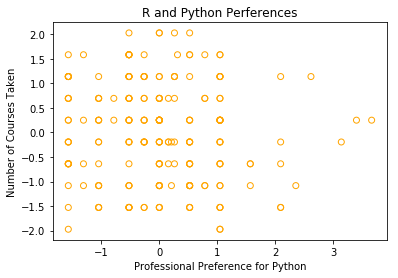

In [17]:
# with scaled data I can compare two variables that before had two very different range of values
# single scatter plot example
fig, axis = plt.subplots()
axis.set_xlabel('Professional Preference for Python')
axis.set_ylabel('Number of Courses Taken')
plt.title('R and Python Perferences')
scatter_plot = axis.scatter(df2['Professional_Python'], 
    df2["Courses_Completed_Prog"],
    facecolors = 'none', 
    edgecolors = 'orange')


#this further cements the prognosis that there are no correlations between courses taken and language preference

### 1.5 | Analyis of New Courses

In [18]:
df[interest_fields].head()

,Python_Course_Interest,Foundations_DE_Course_Interest,Analytics_App_Course_Interest,Systems_Analysis_Course_Interest
RespondentID,,,,
5135740122,50.0,90.0,51.0,50.0
5133300037,20.0,50.0,90.0,50.0
5132253300,100.0,70.0,100.0,60.0
5132096630,85.0,60.0,90.0,82.0
5131990362,60.0,10.0,40.0,80.0


In [19]:
df[interest_fields].describe()

,Python_Course_Interest,Foundations_DE_Course_Interest,Analytics_App_Course_Interest,Systems_Analysis_Course_Interest
count,206.000000,200.000000,203.000000,200.000000
mean,73.529126,58.045000,55.201970,53.630000
std,29.835429,32.588079,34.147954,33.539493
min,0.000000,0.000000,0.000000,0.000000
25%,53.000000,29.500000,25.000000,21.500000
50%,82.500000,60.000000,60.000000,51.500000
75%,100.000000,89.250000,85.000000,80.250000
max,100.000000,100.000000,100.000000,100.000000


C:\Users\David\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\David\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


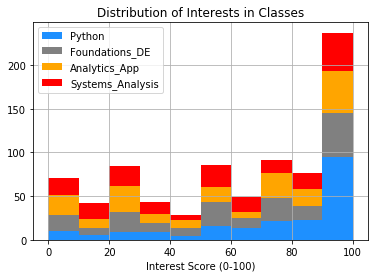

In [20]:
#isolate age values by class
x1 = df['Python_Course_Interest']
x2 = df['Foundations_DE_Course_Interest']
x3 = df['Analytics_App_Course_Interest']
x4 = df['Systems_Analysis_Course_Interest']

#combine threads and plot
plt.hist([x1,x2,x3,x4],stacked = True,color = ["dodgerblue","grey","orange","red"])
plt.title("Distribution of Interests in Classes")
plt.xlabel("Interest Score (0-100)")
plt.legend({'Python':'dodgerblue','Foundations_DE':"grey",'Analytics_App':"orange",'Systems_Analysis':'red'})
plt.grid(True)
plt.show()

#It looks like the Python course has garnered the most interest receieving the highest average and the highest proportion of 
# 100 scores.

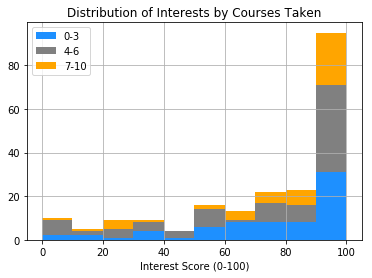

In [21]:
#isolate age values by class
x1 = df[df["Courses_Completed_Bucket"]=='0-3']['Python_Course_Interest']
x2 = df[df["Courses_Completed_Bucket"]=='4-6']['Python_Course_Interest']
x3 = df[df["Courses_Completed_Bucket"]=='7-10']['Python_Course_Interest']

#combine threads and plot
plt.hist([x1,x2,x3],stacked = True,color = ["dodgerblue","grey","orange"])
plt.title("Distribution of Interests by Courses Taken")
plt.xlabel("Interest Score (0-100)")
plt.legend({'0-3':'dodgerblue','4-6':"grey",'7-10':"orange"})
plt.grid(True)
plt.show()

#It looks like the Python course has garnered the most interest receieving the highest average and the highest proportion of 
# 100 scores.